In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath as cm

Write a pyhton function to generate a signal that have frequencies 40,80,160 hz and amplitude 10,20,40 with 512 sample 


13


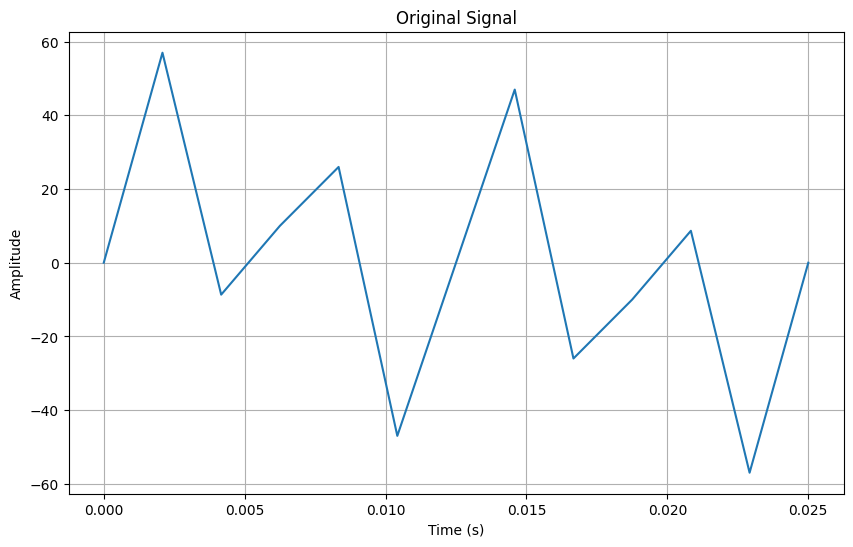

In [9]:
t = np.linspace(0, 0.025, 13)
print(len(t))
y = 10 * np.sin(2 * np.pi * 40 * t) + 20 *np.sin(2 * np.pi * 80 * t) + 40 * np.sin(2 * np.pi * 160 * t)

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

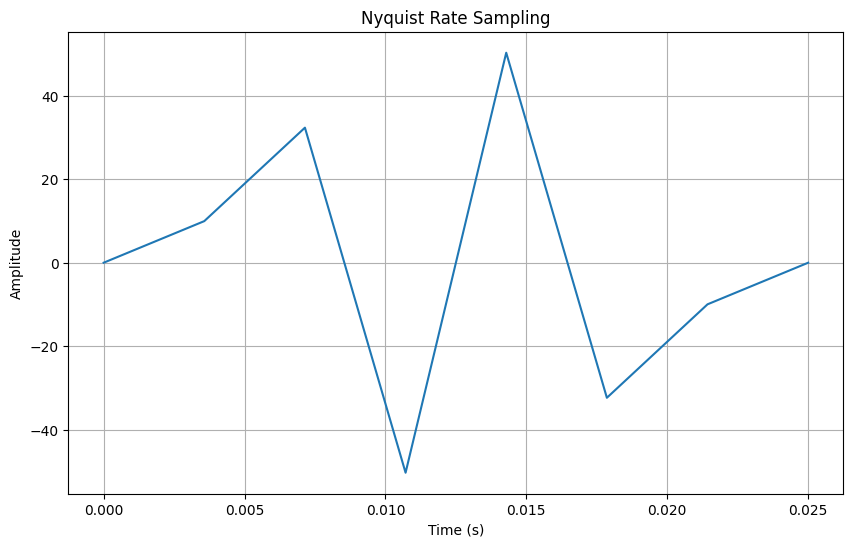

In [11]:
# Sampling at Nyquest rate 
fs = 8 # Nyquist rate 320*0.025 = 8
n_nyquest = np.linspace(0, 0.025, fs)
y_nyquest = 10 * np.sin(2 * np.pi * 40 * n_nyquest) + 20 * np.sin(2 * np.pi * 80 * n_nyquest) + 40 * np.sin(2 * np.pi * 160 * n_nyquest)

plt.figure(figsize=(10, 6))
# plt.stem(n_nyquest, y_nyquest)
plt.plot(n_nyquest, y_nyquest)
plt.title('Nyquist Rate Sampling')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

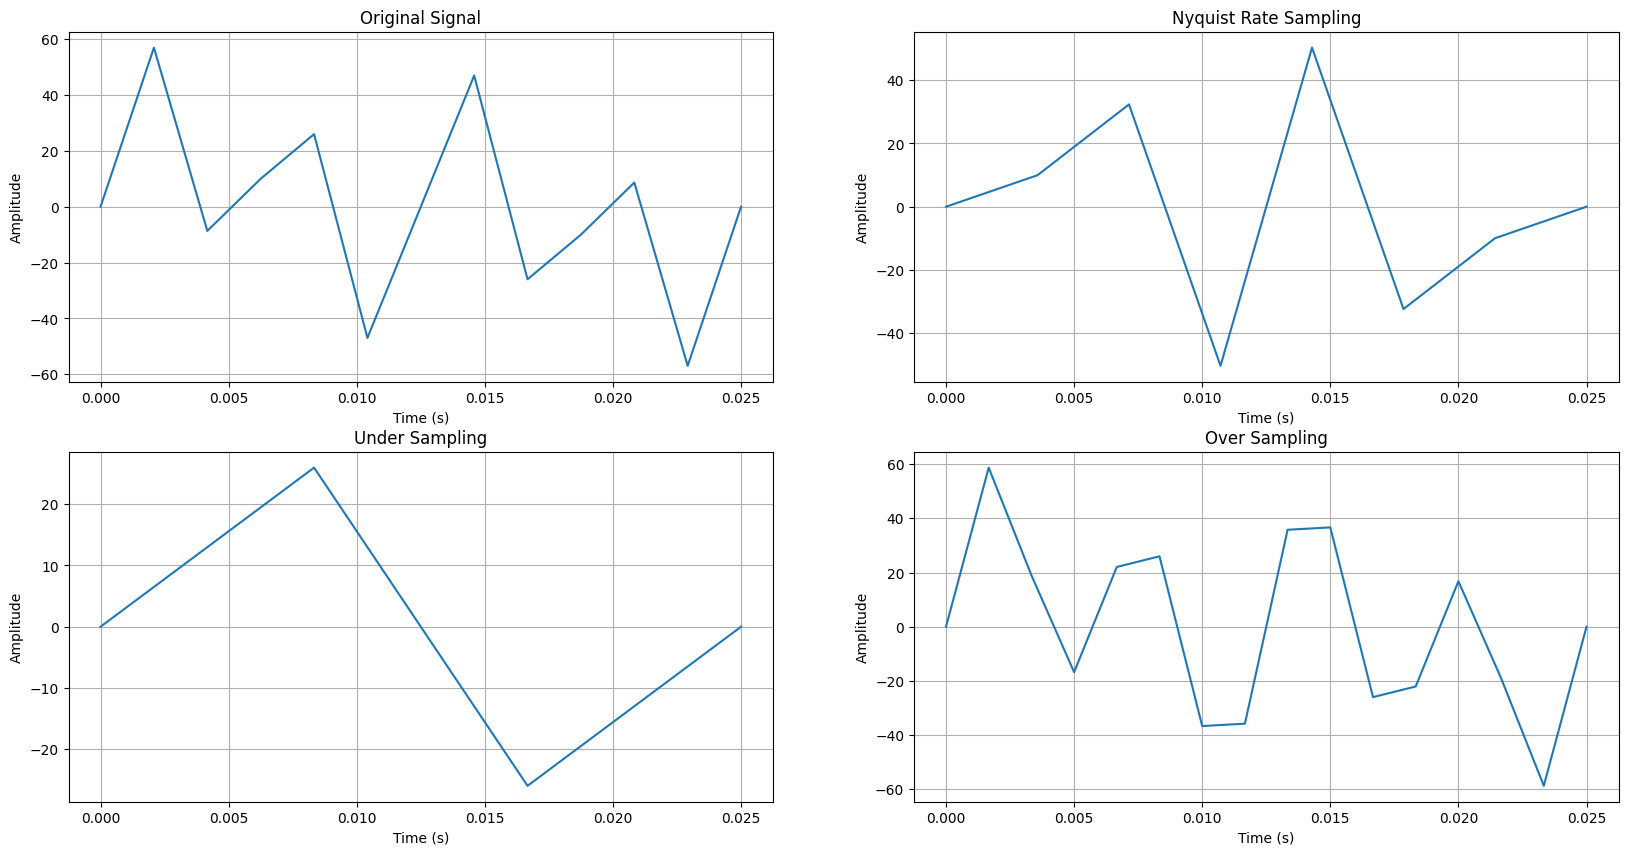

In [15]:
# Up sampling and down sampling

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(t, y)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2,2,2)
plt.plot(n_nyquest, y_nyquest)
plt.title('Nyquist Rate Sampling')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()


# Under sampling
fs = 4 # Nyquist rate 320*0.025 = 8
n_under = np.linspace(0, 0.025, fs)
y_under = 10 * np.sin(2 * np.pi * 40 * n_under) + 20 * np.sin(2 * np.pi * 80 * n_under) + 40 * np.sin(2 * np.pi * 160 * n_under)
plt.subplot(2,2,3)
plt.plot(n_under, y_under)
plt.title('Under Sampling')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# Over sampling
fs = 16 # Nyquist rate 320*0.025 = 8
n_over = np.linspace(0, 0.025, fs)
y_over = 10 * np.sin(2 * np.pi * 40 * n_over) + 20 * np.sin(2 * np.pi * 80 * n_over) + 40 * np.sin(2 * np.pi * 160 * n_over)
plt.subplot(2,2,4)
plt.plot(n_over, y_over)
plt.title('Over Sampling')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()




In [22]:
def dft(x):
    N = len(x)
    X= np.zeros(N, dtype=np.complex128)
    for k in range(N):
        for n in range(N):
            X[k] += x[n]*cm.exp(-2j*math.pi*k*n/N)
    return X        

In [23]:
def get_phase(X):
    phases = []
    for i in X :
        temp = cm.phase(round(i.real, 3) + round(i.imag, 3)*1j)
        phases.append(temp)
    return phases

In [24]:
N = 13 
fs = 512 
t= np.arange(0,1, 1/fs)
y = 10 * np.sin(2 * np.pi * 40 * t) + 20 * np.sin(2 * np.pi * 80 * t) + 40 * np.sin(2 * np.pi * 160 * t)
Y_dft = dft(y)
Y_phase = get_phase(Y_dft)

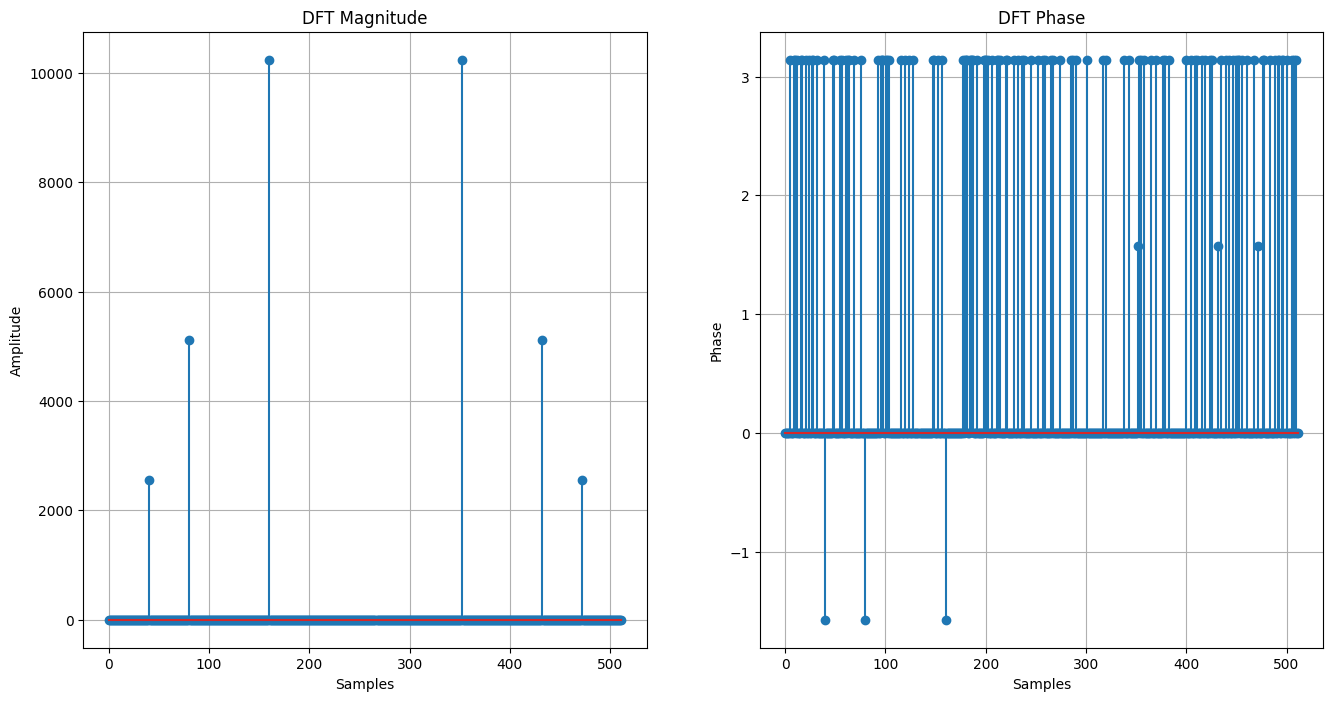

In [26]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.stem(np.abs(Y_dft))
plt.title('DFT Magnitude')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(1, 2, 2)
plt.stem(Y_phase)
plt.title('DFT Phase')
plt.xlabel('Samples')
plt.ylabel('Phase')
plt.grid()